In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures 

In [2]:
df = pd.read_csv("Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df = df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
df.head()

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.corr()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


Text(0.5, 1.0, 'Correlation Metrics')

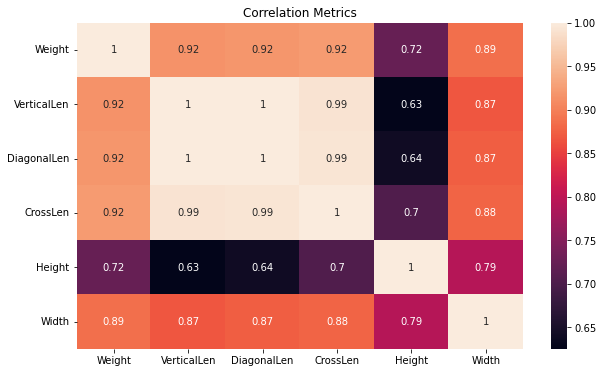

In [6]:
plt.rcParams['figure.figsize'] = (10,6)
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Metrics")

In [7]:
df = df.drop(['VerticalLen', 'DiagonalLen', 'CrossLen'], axis = 1)
print("New Dimention of the shape", df.shape)
df.head()

New Dimention of the shape (159, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


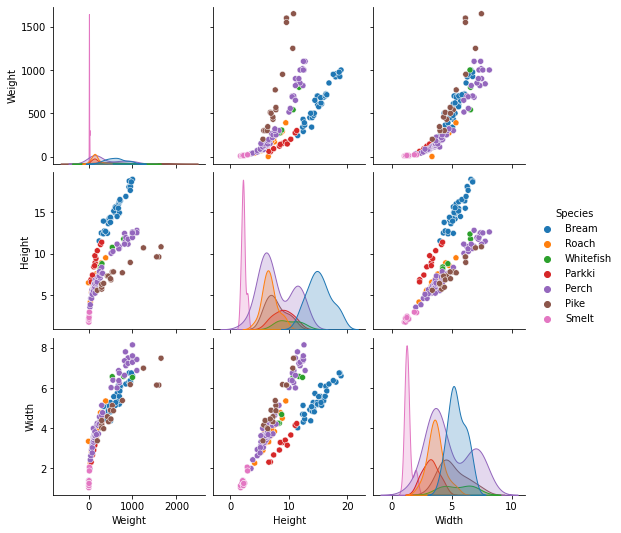

In [8]:
sns.pairplot(df , kind='scatter' , hue = 'Species')

In [10]:
def outlier_detection(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    loweer_end = Q1 - 1.5 * IQR
    outlier = dataframe[(dataframe > upper_end) | (dataframe < loweer_end)]
    return outlier

Text(0.5, 1.0, 'Outlier Detection Based on Weight')

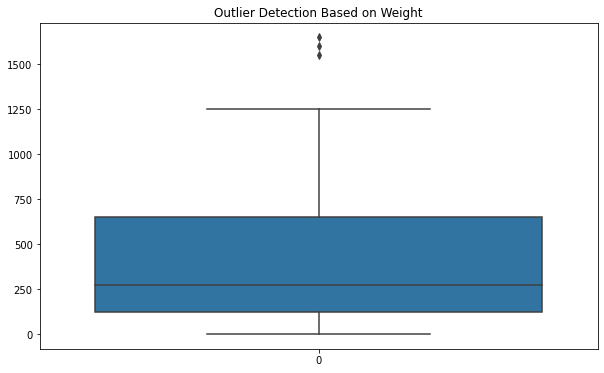

In [11]:
sns.boxplot(data = df['Weight'])
plt.title("Outlier Detection Based on Weight")

In [14]:
df.columns[1:]

Index(['Weight', 'Height', 'Width'], dtype='object')

In [15]:
for column in df.columns[1:]:
    print("\nOutlier in Columns '%s' " % column)
    outlier = outlier_detection(df[column])
    print(outlier)


Outlier in Columns 'Weight' 
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Outlier in Columns 'Height' 
Series([], Name: Height, dtype: float64)

Outlier in Columns 'Width' 
Series([], Name: Width, dtype: float64)


In [16]:
# lets create temp dataframe without 'Weight' feature for plotiing the boxplot 
df_temp = df.drop(['Weight'], axis= "columns")

Text(0.5, 1.0, 'Outlier detection for Perch Specie')

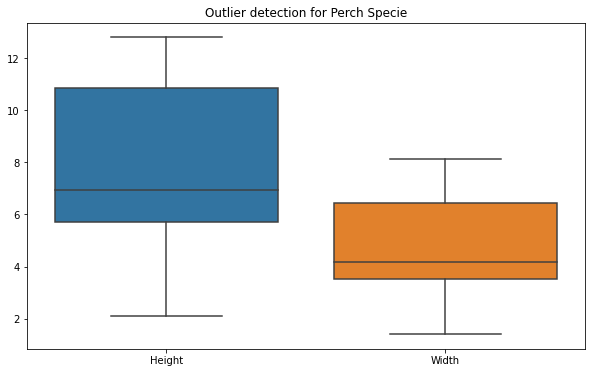

In [18]:
# df_temp[df_temp['Species']=='Perch']
sns.boxplot(data = df_temp[df_temp['Species']=='Perch'])
plt.title("Outlier detection for Perch Specie")

In [24]:
df_perch = df[df['Species']=='Perch']
for column in df_perch.columns[1:]:
    print("\nOutlier in columns '%s'" % column)
    outlier = outlier_detection(df_perch[column])
    print(outlier)


Outlier in columns 'Weight'
Series([], Name: Weight, dtype: float64)

Outlier in columns 'Height'
Series([], Name: Height, dtype: float64)

Outlier in columns 'Width'
Series([], Name: Width, dtype: float64)


Text(0.5, 1.0, 'Outlier Detection For Bream Species')

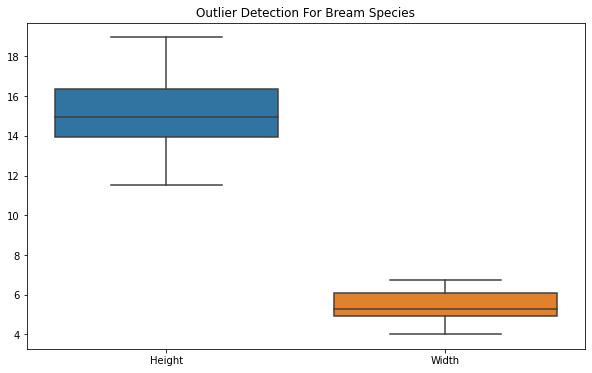

In [25]:
sns.boxplot(data = df_temp[df_temp['Species'] == 'Bream'])
plt.title('Outlier Detection For Bream Species')

In [26]:
df_bream = df[df['Species'] == 'Bream']
for column in df_bream.columns[1:]:
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_bream[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


Text(0.5, 1.0, 'Outlier Detection For Roach Species')

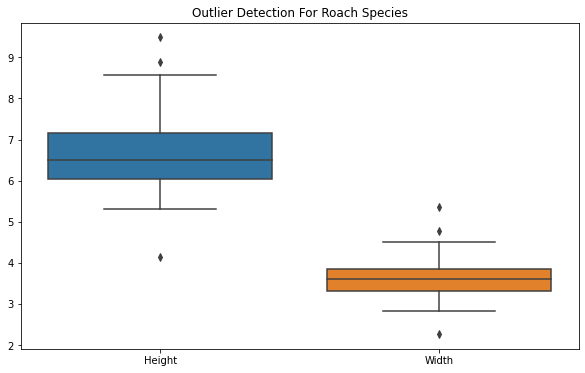

In [27]:
sns.boxplot(data= df_temp[df_temp.Species == 'Roach'] )
plt.title('Outlier Detection For Roach Species')

In [29]:
df_Roach = df[df['Species'] == 'Roach']
for column in df_Roach.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Roach[column])
    print(outlier)


Outliers in column "Weight" 
40      0.0
52    290.0
54    390.0
Name: Weight, dtype: float64

Outliers in column "Height" 
35    4.1472
52    8.8768
54    9.4850
Name: Height, dtype: float64

Outliers in column "Width" 
35    2.2680
53    4.7736
54    5.3550
Name: Width, dtype: float64


Text(0.5, 1.0, 'Outlier Detection For Pike Species')

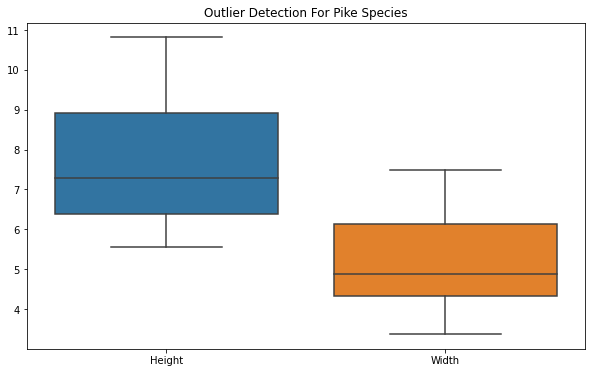

In [30]:
sns.boxplot(data= df_temp[df_temp.Species == 'Pike'] )
plt.title('Outlier Detection For Pike Species')

In [32]:
df_Pike = df[df['Species'] == 'Pike']
for column in df_Pike.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Pike[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


Text(0.5, 1.0, 'Outlier Detection For Smelt Species')

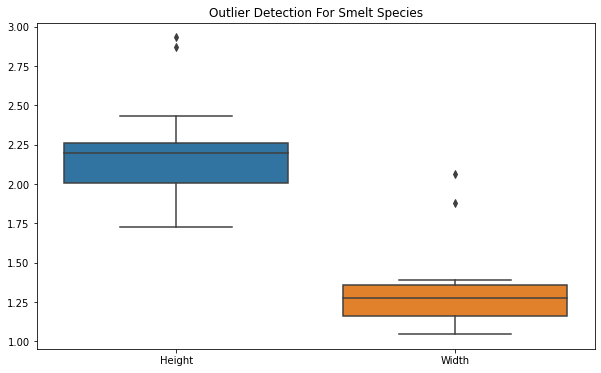

In [33]:
sns.boxplot(data= df_temp[df_temp.Species == 'Smelt'] )
plt.title('Outlier Detection For Smelt Species')

In [34]:
df_Smelt = df[df['Species'] == 'Smelt']
for column in df_Smelt.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Smelt[column])
    print(outlier)


Outliers in column "Weight" 
157    19.7
158    19.9
Name: Weight, dtype: float64

Outliers in column "Height" 
157    2.8728
158    2.9322
Name: Height, dtype: float64

Outliers in column "Width" 
157    2.0672
158    1.8792
Name: Width, dtype: float64


Text(0.5, 1.0, 'Outlier Detection For Smelt Species')

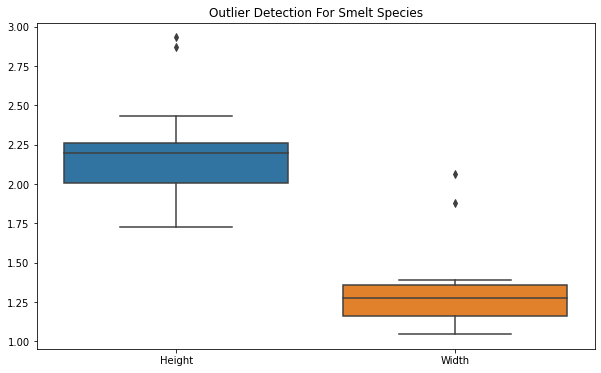

In [35]:
sns.boxplot(data= df_temp[df_temp.Species == 'Smelt'] )
plt.title('Outlier Detection For Smelt Species')

In [36]:
df_Smelt = df[df['Species'] == 'Smelt']
for column in df_Smelt.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Smelt[column])
    print(outlier)


Outliers in column "Weight" 
157    19.7
158    19.9
Name: Weight, dtype: float64

Outliers in column "Height" 
157    2.8728
158    2.9322
Name: Height, dtype: float64

Outliers in column "Width" 
157    2.0672
158    1.8792
Name: Width, dtype: float64


Text(0.5, 1.0, 'Outlier Detection For Parkki Species')

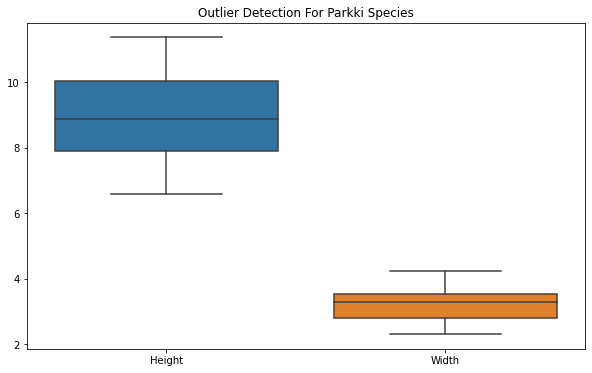

In [37]:
sns.boxplot(data= df_temp[df_temp.Species == 'Parkki'] )
plt.title('Outlier Detection For Parkki Species')

In [39]:
df_Parkki = df[df['Species'] == 'Parkki']
for column in df_Parkki.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Parkki[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


Text(0.5, 1.0, 'Outlier Detection For Whitefish Species')

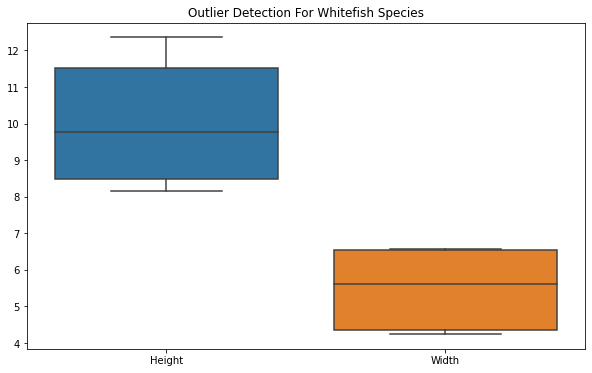

In [40]:
sns.boxplot(data= df_temp[df_temp.Species == 'Whitefish'] )
plt.title('Outlier Detection For Whitefish Species')

In [41]:
df_Whitefish = df[df['Species'] == 'Whitefish']
for column in df_Whitefish.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Whitefish[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


In [42]:
df = df.drop([35,54,157,158])
df.shape

(155, 4)

In [43]:
df.isna().sum()

Species    0
Weight     0
Height     0
Width      0
dtype: int64

In [44]:
df[df['Weight'] <= 0]

,Species,Weight,Height,Width
40,Roach,0.0,6.4752,3.3516


In [45]:
df = df.drop([40])
df.shape

(154, 4)

In [46]:
dummies_species = pd.get_dummies(df['Species'])
dummies_species.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [47]:
df = pd.concat([df , dummies_species], axis = 1)
df.head()

,Species,Weight,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,12.4440,5.1340,1,0,0,0,0,0,0


In [48]:
df = df.drop(['Species','Whitefish'], axis = 'columns')
df.head()

,Weight,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,11.5200,4.0200,1,0,0,0,0,0
1,290.0,12.4800,4.3056,1,0,0,0,0,0
2,340.0,12.3778,4.6961,1,0,0,0,0,0
3,363.0,12.7300,4.4555,1,0,0,0,0,0
4,430.0,12.4440,5.1340,1,0,0,0,0,0


In [49]:
X = df[['Height', 'Width', 'Bream', 'Parkki' ,'Perch', 'Pike', 'Roach', 'Smelt']] # Or can use df6.iloc[:,[1,2,3,4,5,6,7,8]]
y = df[['Weight']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (123, 8)
X_test dimension=  (31, 8)
y_train dimension=  (123, 1)
y_train dimension=  (31, 1)


In [51]:
def polynomial_plot(feature, label):
  # Create 1D array. We can use 'squeeze' function to reduce the 2D array to 1D array
  x_coordinates = feature
  y_coordinates = np.squeeze(label)

 # Contruct first degree polynomial function
  linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
  # Contruct second degree polynomial function
  quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))
 
  # Generate evenly spaced values
  values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

  plt.scatter(x_coordinates,y_coordinates, color='blue')  
  plt.plot(values, linear_func(values), color='cyan', linestyle='dashed', label='Linear Function')
  plt.plot(values, quadratic_func(values), color='red', label='Quadratic Function')
  plt.xlabel('%s From Test Data'%(feature.name))
  plt.ylabel('Weight')
  plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
  plt.legend()
  plt.title("Linear Vs Quadratic Function For Feature %s" % (feature.name))
  plt.show()  

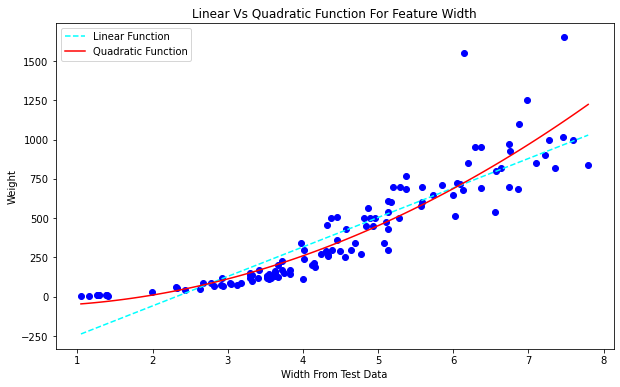

In [52]:
polynomial_plot(X_train.Width, y_train)

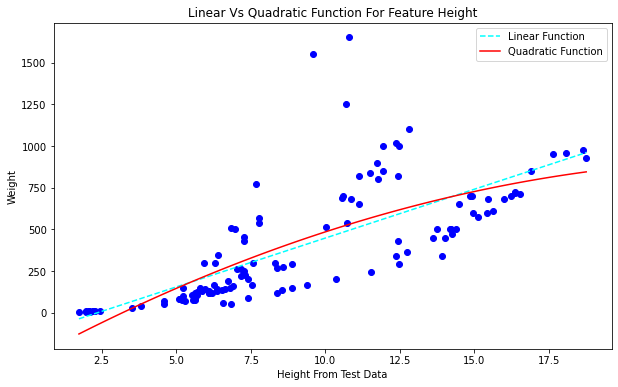

In [53]:
polynomial_plot(X_train.Height, y_train)

In [54]:
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train) 
poly.fit(X_poly, y_train) 

PolynomialFeatures()

In [55]:
lm = linear_model.LinearRegression() 
lm.fit(X_poly, y_train) 

LinearRegression()

In [56]:
predictions = lm.predict(poly.fit_transform(X_test))
print('r2_score= ', metrics.r2_score(y_test, predictions))

r2_score=  0.9474006866372422


In [57]:
predictedWeight = pd.DataFrame(predictions, columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Weight,7.000000,1600.000000,250.000000,110.000000,115.000000,620.000000,9.800000,300.000000,200.000000,180.000000,...,197.000000,920.000000,320.000000,700.000000,145.000000,270.000000,180.000000,1000.000000,950.000000,390.000000
Predicted Weight,6.532541,1153.422673,283.348381,120.458547,128.444493,613.677704,9.688728,240.207204,107.597608,172.977748,...,192.549743,925.531081,290.234886,687.260885,141.119054,220.460222,169.594906,1051.937183,1041.910518,383.839762


Text(0.5, 1.0, 'Weight From test Data Vs Weight Predicted By Model')

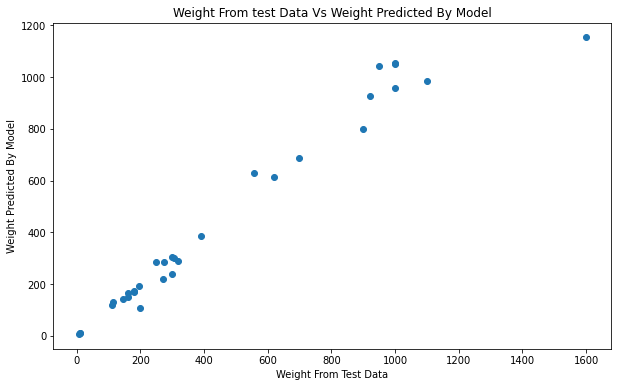

In [58]:
plt.scatter(y_test, predictions)
plt.xlabel('Weight From Test Data')
plt.ylabel('Weight Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Weight From test Data Vs Weight Predicted By Model")

/home/danyal/anaconda3/envs/tf/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

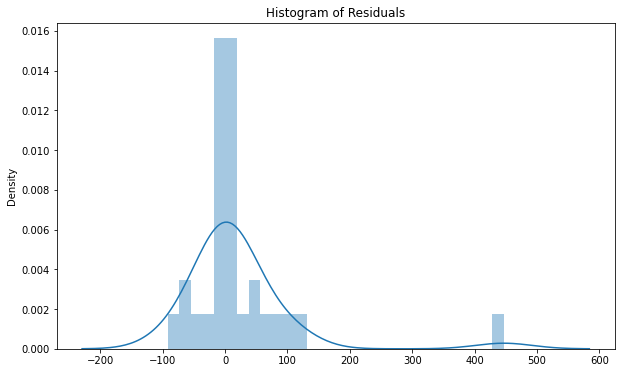

In [59]:
sns.distplot((y_test-predictions))
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Histogram of Residuals")